In this example we are explaining the output of ResNet50 model for classifying images into 1000 ImageNet classes.


In [1]:
!pip install shap


     |████████████████████████████████| 564 kB 5.2 MB/s 


In [2]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap


In [3]:
# load pre-trained model and data
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()

102981632/102967424 [==============================] - 1s 0us/step


In [4]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
#print("Number of ImageNet classes:", len(class_names))
#print("Class names:", class_names)

## SHAP ResNet50 model explanation for images

Build a partition explainer with: 

- the model (a python function) 

- the masker (a python function) 

- output names (a list of names of the output classes)

In [5]:
# 1st - quick run

# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

Partition explainer: 3it [00:45, 22.67s/it]


Explainer options:


Above image masker uses a blurring technique called “inpaint_telea”. There are alternate masking options available to experiment with such as “inpaint_ns” and “blur(kernel_xsize, kernel_xsize)”.

Recommended number of evaluations is 300-500 to get explanations with sufficient granularity for the super pixels. More the number of evaluations, more the granularity but also increases run-time.

Note: outputs=shap.Explanation.argsort.flip[:4] has been used in the code above for getting SHAP values because we want to get the top 4 most probable classes for each image i.e. top 4 classes with decreasing probability. Hence, a flip argsort sliced by 4 has been used.

## Lets visualize SHAP values as the most significant areas on the particular images

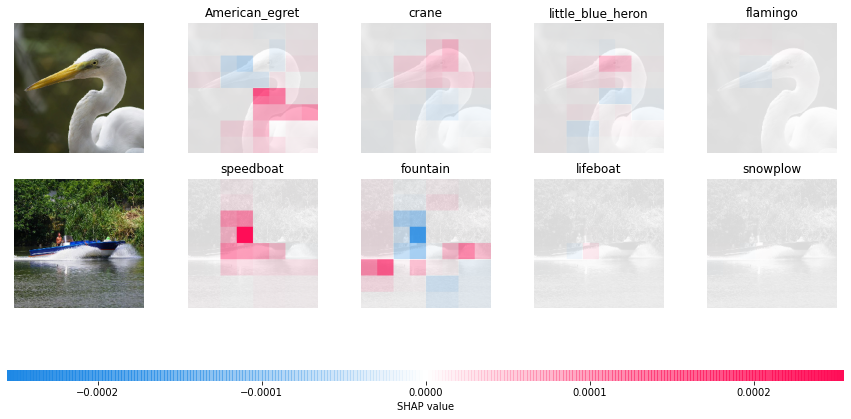

In [6]:
# output with shap values
shap.image_plot(shap_values)

By increasing the max_evals parameter we let SHAP execute the original model more times and so get a more finely detailed explaination. 

blur kernel - is much faster than inpainting. 

That this will take a while if you are not using a modern GPU on your system.

In [7]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(X[1:3], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/2498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/2498 [00:00<?, ?it/s]

Partition explainer: 3it [00:51, 26.00s/it]


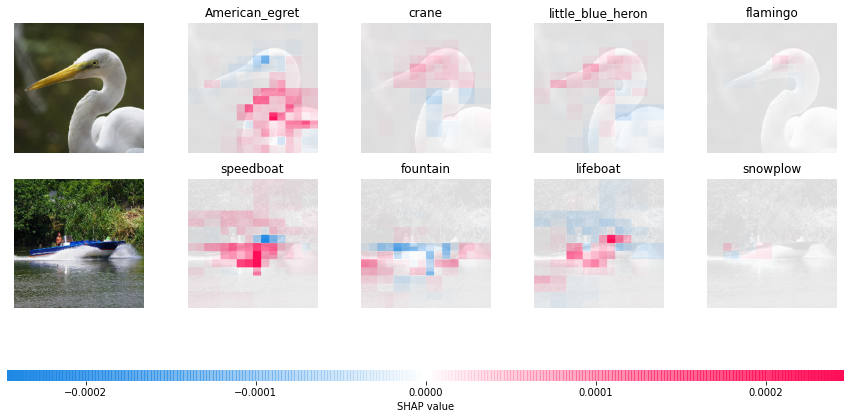

In [8]:
# output with shap values
shap.image_plot(shap_values_fine)